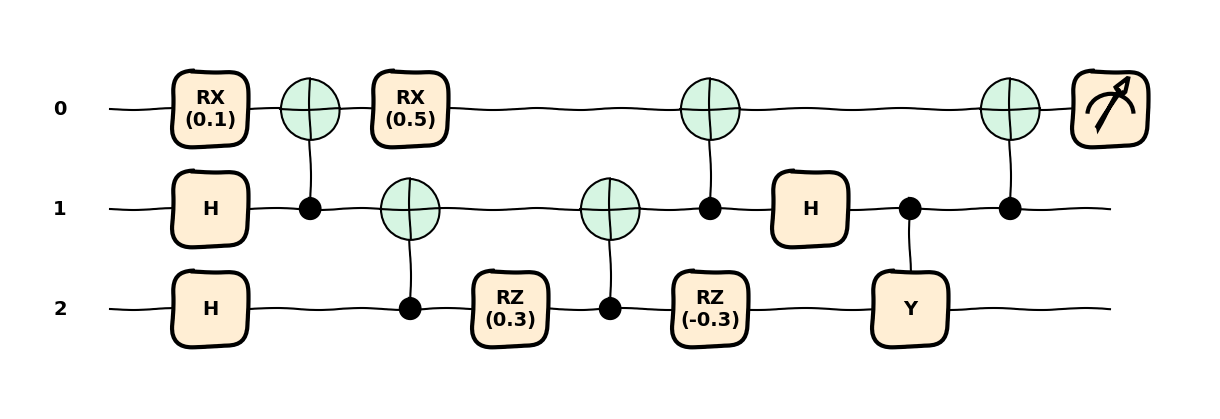

In [8]:
import matplotlib.pyplot as plt
import pennylane as qml

dev = qml.device("default.qubit", wires=3)

def circuit(angles):
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.RX(angles[0], 0)
    qml.CNOT(wires=[1, 0])
    qml.CNOT(wires=[2, 1])
    qml.RX(angles[2], wires=0)
    qml.RZ(angles[1], wires=2)
    qml.CNOT(wires=[2, 1])
    qml.RZ(-angles[1], wires=2)
    qml.CNOT(wires=[1, 0])
    qml.Hadamard(wires=1)
    qml.CY(wires=[1, 2])
    qml.CNOT(wires=[1, 0])
    return qml.expval(qml.PauliZ(wires=0))

angles = [0.1, 0.3, 0.5]
qnode = qml.QNode(circuit, dev)
qml.draw_mpl(qnode, decimals=1, style="sketch")(angles)
plt.show()

In [17]:
import pennylane as qml
from pennylane import numpy as np
import math

dev1 = qml.device("default.qubit", wires = 1)
# name of the device to be loaded, number of sub sys(= qubit)

@qml.qnode(dev1, interface = "autograd")
def circuit(parmas):
    qml.RX(parmas[0], wires=0)
    #  paramas = rotation angle in radian
    qml.RY(parmas[1], wires=0)

    return qml.expval(qml.PauliZ(0))

print(circuit([math.pi/2, math.pi ]))


# important fact: rotation in pennylane = CCW
# result of the expectation value = probability of state 1 (= |1> )

dcircuit = qml.grad(circuit, argnum=0)
print(dcircuit([0.54, 0.12]))

-2.220446049250313e-16
[array(-0.51043865), array(-0.1026782)]


In [19]:
@qml.qnode(dev1, interface="autograd")
def circuit2(phi1, phi2):
    qml.RX(phi1, wires=0)
    qml.RY(phi2, wires=0)
    return qml.expval(qml.PauliZ(0))

dcircuit = qml.grad(circuit2, argnum=[0, 1])
print(dcircuit(0.54, 0.12))

(array(-0.51043865), array(-0.1026782))


In [31]:
def cost(x):
    return circuit(x)
#  circuit함수 = 두 angle받아서 RX, RY해서 PauliZ 기대값(측정 값) 리턴

# 7.15266381e-18 3.14159265e+00
init_params = np.array([0.011, 0.012], requires_grad = True)
print(cost(init_params))

0.9998675058299389


In [34]:
opt = qml.GradientDescentOptimizer(stepsize = 0.4)

steps = 100

params = init_params
# set initial value

for i in range(steps):
    params = opt.step(cost, params)

    if(i + 1 ) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i+1, cost(params)))
        print("rotation angles: {}".format(params))

print("Optimized rotation angles: {}".format(params))
        

Cost after step     5:  0.9961778
rotation angles: [0.05911537 0.0644936 ]
Cost after step    10:  0.8974944
rotation angles: [0.31109663 0.34002089]
Cost after step    15:  0.1440490
rotation angles: [1.09530423 1.25068588]
Cost after step    20: -0.1536720
rotation angles: [1.1317852 1.9407188]
Cost after step    25: -0.9152496
rotation angles: [0.29269523 2.84352066]
Cost after step    30: -0.9994046
rotation angles: [0.02419352 3.11698103]
Cost after step    35: -0.9999964
rotation angles: [1.88206857e-03 3.13967807e+00]
Cost after step    40: -1.0000000
rotation angles: [1.46350019e-04 3.14144378e+00]
Cost after step    45: -1.0000000
rotation angles: [1.13801776e-05 3.14158108e+00]
Cost after step    50: -1.0000000
rotation angles: [8.84922614e-07 3.14159175e+00]
Cost after step    55: -1.0000000
rotation angles: [6.88115824e-08 3.14159258e+00]
Cost after step    60: -1.0000000
rotation angles: [5.35078865e-09 3.14159265e+00]
Cost after step    65: -1.0000000
rotation angles: [4.